In [223]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

In [224]:
#jerky_df = pd.read_csv("demo1.csv")
jerky_df = pd.read_excel('demo.xlsx', index_col=None,
              dtype={'Definitions': str, 'Domains': str}) 
print(jerky_df.head(3)) #top-3 rows 
print(jerky_df['Definitions'].count()) #no of definitions

                                         Definitions     Domains
0  automatic computing principles such as self-co...  technology
1  approach (public or private) to managing devel...      growth
2  Smart city maximizes services to citizens whil...        city
286


In [225]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words("english"))
#show how many words are in the list of stop words
print(len(stop_words))
#179
#loops through descriptions and cleans them
clean_def = []
for w in range(len(jerky_df.Definitions)):
    desc = jerky_df['Definitions'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_def.append(desc)
#assign the cleaned descriptions to the data frame
jerky_df['clean_def'] = clean_def
#calculate the frequency - for top-30 words
word_frequency = pd.Series(' '.join(jerky_df['clean_def']).split()).value_counts()[:50] 
word_frequency

179


and               625
the               461
of                424
a                 300
to                290
smart             231
city              195
in                169
is                130
that              101
as                 90
with               84
cities             83
are                81
on                 66
quality            65
for                62
life               58
technology         56
information        53
which              53
social             52
its                48
governance         48
urban              48
an                 47
be                 46
their              46
infrastructure     45
data               44
sustainable        42
economic           41
environment        40
technologies       40
by                 40
development        37
ict                37
from               37
citizens           36
services           36
through            34
resources          33
management         33
can                33
it                 32
people    

In [226]:
#add single word to stoplist
#stop_words.add("wine")
#add list of words to stoplist
add_stopwords = ["smart", "cities", "city"]
stop_words = stop_words.union(add_stopwords)
print(len(stop_words))
#181

182


In [232]:
#To group definitions based on Domain-names

Domains = jerky_df['Domains'].unique()
Domuniquenames = jerky_df.Domains.unique()
print(Domuniquenames) #no of unique domains

Domdict = {elem : pd.DataFrame() for elem in Domuniquenames}

for key in Domdict.keys():
    Domdict[key] = jerky_df[:][jerky_df.Domains == key]


['technology' 'growth' 'city' 'governance' 'port' 'work' 'planet'
 'tourism' 'solutions' 'regulation' 'collaboration' 'region' 'objects'
 'learning environment' 'community' 'health' 'building']


In [233]:
Domdict['building'] #to filter specific domain-related definitions

,Definitions,Domains,clean_def
257,application of ubiquitous or pervasive comput...,building,application of ubiquitous or pervasive comput...
259,The concept of smart is receiving a great amou...,building,the concept of smart is receiving a great amou...
260,buildings involve the usage of design solution...,building,buildings involve the usage of design solution...
261,buildings create an environment that maximizes...,building,buildings create an environment that maximizes...
262,these (smart) buildings “decide” the most effi...,building,these smart buildings decide the most efficien...
263,(buildings provide) user-comfort solutions and...,building,buildings provide user comfort solutions and ...
264,buildings are becoming more attractive and via...,building,buildings are becoming more attractive and via...
265,"In a building, different information such as t...",building,in a building different information such as te...
266,The idea of building originated from the conce...,building,the idea of building originated from the conce...
267,buildings can deal with the energy efficiency ...,building,buildings can deal with the energy efficiency ...


In [234]:
Domuniquenames

array(['technology', 'growth', 'city', 'governance', 'port', 'work',
       'planet', 'tourism', 'solutions', 'regulation', 'collaboration',
       'region', 'objects', 'learning environment', 'community', 'health',
       'building'], dtype=object)

In [205]:
#inline function to produce word count, splitting on spaces -- specific to domains
grouped = jerky_df.groupby(jerky_df.Domains)
grouped.describe()
grouped.head(1) #displays the first entry among all 17 domains

,Definitions,Domains,clean_def,word_count
0,automatic computing principles such as self-co...,technology,automatic computing principles such as self co...,14
1,approach (public or private) to managing devel...,growth,approach public or private to managing develop...,19
2,Smart city maximizes services to citizens whil...,city,smart city maximizes services to citizens whil...,23
3,Being smart involves strategic directions and ...,governance,being smart involves strategic directions and ...,13
4,"gathers better-educated individuals, skilled w...",port,gathers better educated individuals skilled wo...,35
44,an alternative way of organizing work with tel...,work,an alternative way of organizing work with tel...,34
53,"governments, businesses, and societies harness...",planet,governments businesses and societies harnessin...,20
54,Tourism supported by integrated efforts at a d...,tourism,tourism supported by integrated efforts at a d...,57
59,technology-based applications and tools a smar...,solutions,technology based applications and tools a smar...,26
63,pluralist and innovative approaches to social ...,regulation,pluralist and innovative approaches to social ...,26


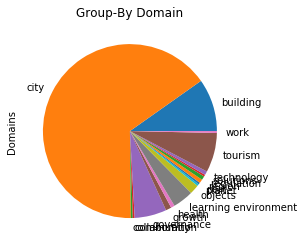

In [235]:
grouped['Domains'].agg('count').plot(kind='pie',title='Group-By Domain')


In [ ]:
new_df = 


In [238]:
jerky_df.head()

,Definitions,Domains,clean_def
0,automatic computing principles such as self-co...,technology,automatic computing principles such as self co...
1,approach (public or private) to managing devel...,growth,approach public or private to managing develop...
2,Smart city maximizes services to citizens whil...,city,smart city maximizes services to citizens whil...
3,Being smart involves strategic directions and ...,governance,being smart involves strategic directions and ...
4,"gathers better-educated individuals, skilled w...",port,gathers better educated individuals skilled wo...


In [240]:
#inline function to produce word count, splitting on spaces
jerky_df['word_count'] = jerky_df['clean_def'].apply(lambda x: len(str(x).split(" ")))
jerky_df.word_count.describe()
#print(jerky_df.head(3))

count    286.000000
mean      36.069930
std       20.040363
min        8.000000
25%       22.250000
50%       33.000000
75%       43.000000
max      158.000000
Name: word_count, dtype: float64

In [241]:
print(jerky_df.head(3))

                                         Definitions     Domains  \
0  automatic computing principles such as self-co...  technology   
1  approach (public or private) to managing devel...      growth   
2  Smart city maximizes services to citizens whil...        city   

                                           clean_def  word_count  
0  automatic computing principles such as self co...          14  
1  approach public or private to managing develop...          19  
2  smart city maximizes services to citizens whil...          23  


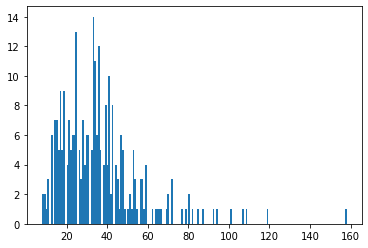

In [242]:
#set x for the histogram and set bins based on max
x = jerky_df['word_count']
n_bins = 175
#plot histogram
plt.hist(x, bins=n_bins)
plt.show()

In [243]:
jerky_df['clean_def']
#jerky_df['clean_desc'].describe()

0      automatic computing principles such as self co...
1      approach public or private to managing develop...
2      smart city maximizes services to citizens whil...
3      being smart involves strategic directions and ...
4      gathers better educated individuals skilled wo...
                             ...                        
281    buildings that are self aware grid aware inter...
282    suite of technologies used to make design cons...
283    sb are buildings that are integrated and proac...
284    any physical entity that can exchange data wit...
285    a building which totally controls its own envi...
Name: clean_def, Length: 286, dtype: object

In [244]:
print(jerky_df['Domains'].unique())
print(len(jerky_df['Domains'].unique()))

['technology' 'growth' 'city' 'governance' 'port' 'work' 'planet'
 'tourism' 'solutions' 'regulation' 'collaboration' 'region' 'objects'
 'learning environment' 'community' 'health' 'building']
17


In [366]:
city_df = jerky_df.loc[jerky_df['Domains'] == 'city']
print(city_df.head(5))


tourism_df = jerky_df.loc[jerky_df['Domains'] == 'tourism']
print(tourism_df.head(5))

governance_df = jerky_df.loc[jerky_df['Domains'] == 'governance']
print(governance_df.head(5))

building_df = jerky_df.loc[jerky_df['Domains'] == 'building']
learningenv_df = jerky_df.loc[jerky_df['Domains'] == 'learning environment']
enviro_df = pd.concat([learningenv_df,building_df])
print(enviro_df.head(5))

#print(city_df.head(5))

technology_df = jerky_df.loc[jerky_df['Domains'] == 'technology']
growth_df = jerky_df.loc[jerky_df['Domains'] == 'growth']
health_df = jerky_df.loc[jerky_df['Domains'] == 'health']
region_df = jerky_df.loc[jerky_df['Domains'] == 'region']
objects_df = jerky_df.loc[jerky_df['Domains'] == 'objects']
solutions_df = jerky_df.loc[jerky_df['Domains'] == 'solutions']
regulation_df = jerky_df.loc[jerky_df['Domains'] == 'regulation']
collaboration_df = jerky_df.loc[jerky_df['Domains'] == 'collaboration']
port_df = jerky_df.loc[jerky_df['Domains'] == 'port']
community_df = jerky_df.loc[jerky_df['Domains'] == 'community']
planet_df = jerky_df.loc[jerky_df['Domains'] == 'planet']
work_df = jerky_df.loc[jerky_df['Domains'] == 'work']

misc_df = pd.concat([technology_df,growth_df,health_df,region_df,objects_df,solutions_df,regulation_df,collaboration_df,port_df,community_df,planet_df,work_df])
print(misc_df.head(5))


#some more dataframes - just for plotting pie-chart
others_df = misc_df.assign(Domains='others')
Built_envir_df = enviro_df.assign(Domains='built-envir')
#others_df.head(10)
Built_envir_df.head(10)

                                         Definitions Domains  \
2  Smart city maximizes services to citizens whil...    city   
5  A city can be defined as "smart" when investme...    city   
6  Smart Growth is so many different things. It’s...    city   
7  A city well performing in a forward-looking wa...    city   
8  Smart city stands out as a new set of concepts...    city   

                                           clean_def  word_count  
2  smart city maximizes services to citizens whil...          23  
5  a city can be defined as smart when investment...          41  
6  smart growth is so many different things it s ...          43  
7  a city well performing in a forward looking wa...          33  
8  smart city stands out as a new set of concepts...          92  
                                          Definitions  Domains  \
54  Tourism supported by integrated efforts at a d...  tourism   
55  Innovative tourist destination, built on an in...  tourism   
56  helps admin

,Definitions,Domains,clean_def,word_count
166,“Smart University is a concept that involves a...,built-envir,smart university is a concept that involves a...,77
167,learning environments “… that can be regarded ...,built-envir,learning environments that can be regarded as ...,158
168,"“A smart, multi-disciplinary student-centric e...",built-envir,a smart multi disciplinary student centric ed...,59
169,“Education in a smart environment supported by...,built-envir,education in a smart environment supported by...,65
170,Intelligent campus (i-campus) as “… a new para...,built-envir,intelligent campus i campus as a new paradigm ...,72
171,“Smart campus is the outcome of the applicatio...,built-envir,smart campus is the outcome of the applicatio...,42
172,“A smart campus depends on an overarching stra...,built-envir,a smart campus depends on an overarching stra...,51
174,“… a SMART model of smart classroom which char...,built-envir,a smart model of smart classroom which charac...,17
175,"“Smart classrooms integrate voice-recognition,...",built-envir,smart classrooms integrate voice recognition ...,30
176,“Combining the IoT technology with social and ...,built-envir,combining the iot technology with social and ...,44


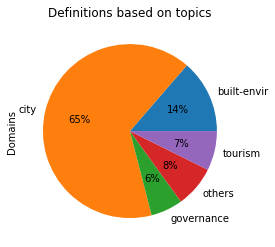

In [369]:
#this rev_df dataframe is just created to plot pie-chart distribution of definitions based on domains from filtered literature

rev_df = pd.concat([city_df, governance_df, tourism_df, Built_envir_df, others_df])

grouped = rev_df.groupby(rev_df.Domains)

grouped['Domains'].agg('count').plot(kind='pie',title='Definitions based on topics', autopct='%1.0f%%')


In [350]:
#Building overall word corpus from defintions

from nltk.stem.wordnet import WordNetLemmatizer
stem_def = []
for w in range(len(jerky_df['clean_def'])):
    split_text = jerky_df['clean_def'][w].split()
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    stem_def.append(split_text)
stem_def

['automatic computing principle self configuration selfprotection self healing self optimization',
 'approach public private managing development lead economic advancement without congestion environmental degradation',
 'maximizes service citizen monitoring integrating critical infrastructure planning preventive maintenance action optimizing resource monitoring security aspect',
 'involves strategic direction associated achieving policy success',
 'gather better educated individual skilled workforce intelligent infrastructure automation facilitate knowledge development sharing optimize port operation enhance port resiliency lead sustainable development guarantee safe secure activity',
 'defined investment human social capital modern transport communication infrastructure fuel sustainable economic growth high quality life wise management natural resource participatory governance',
 'growth many different thing transportation mindset toward creating holistic community talked quality life

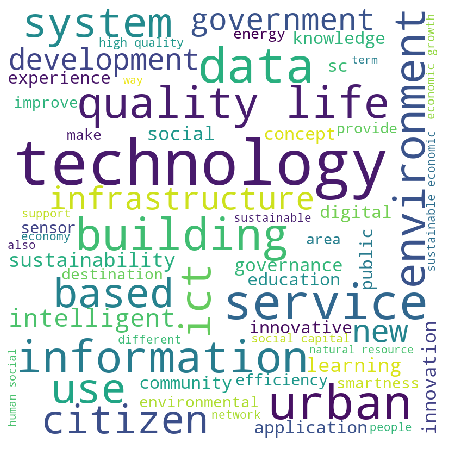

In [351]:
#set the word cloud parameters - overall 
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(stem_def))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [289]:
city_df['clean_def'][2]

'smart city maximizes services to citizens while monitoring and integrating critical infrastructures planning preventive maintenance actions optimizing resources and monitoring security aspects '

In [294]:
# key to reset indexing sliced dataframes prior to building individual word corpus
type(city_df)
city = city_df.reset_index(drop=True)
city.head()

,Definitions,Domains,clean_def,word_count
0,Smart city maximizes services to citizens whil...,city,smart city maximizes services to citizens whil...,23
1,"A city can be defined as ""smart"" when investme...",city,a city can be defined as smart when investment...,41
2,Smart Growth is so many different things. It’s...,city,smart growth is so many different things it s ...,43
3,A city well performing in a forward-looking wa...,city,a city well performing in a forward looking wa...,33
4,Smart city stands out as a new set of concepts...,city,smart city stands out as a new set of concepts...,92


In [348]:
#Building word corpus from defintions for Topic = CITY

from nltk.stem.wordnet import WordNetLemmatizer
city_def = []
for w in range(len(city.loc[city['Domains'] == 'city'])):
    #print(w)
    
    split_text = city['clean_def'][w].split()
    #print(split_text)
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    city_def.append(split_text)
city_def

['maximizes service citizen monitoring integrating critical infrastructure planning preventive maintenance action optimizing resource monitoring security aspect',
 'defined investment human social capital modern transport communication infrastructure fuel sustainable economic growth high quality life wise management natural resource participatory governance',
 'growth many different thing transportation mindset toward creating holistic community talked quality life fundamental quality life physical health',
 'well performing forward looking way economy people governance mobility environment living built combination endowment activity selfdecisive independent aware citizen',
 'stand new set concept social inclusion role internet creation new business job provision high quality service empowerment citizen information prominent feature position distinct category urban modernization ambition initiative fact family concept seems least present way become leading driver urban sustainability r

In [315]:
['clean_def']

NameError: name 'governance' is not defined

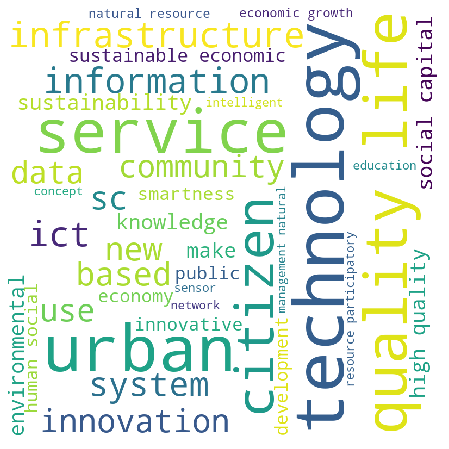

In [349]:
#set the word cloud parameters - for topic == city  
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(city_def))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [347]:
#Building word corpus from defintions for Topic = Governance

# reset indexing prior to building individual word corpus
type(governance_df)
gov = governance_df.reset_index(drop=True)
gov.head()

from nltk.stem.wordnet import WordNetLemmatizer
gov_def = []
for w in range(len(gov.loc[gov['Domains'] == 'governance'])):
    #print(w)
    
    split_text = gov['clean_def'][w].split()
    #print(split_text)
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    gov_def.append(split_text)
gov_def

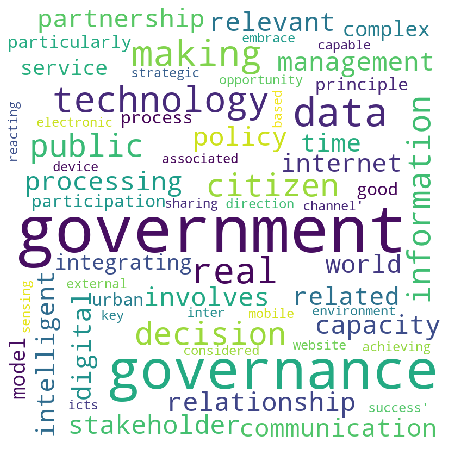

In [344]:
#set the word cloud parameters - for topic == governance  
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(gov_def))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [340]:
#Building word corpus from defintions for Topic = Tourism

# reset indexing prior to building individual word corpus
type(tourism_df)
tour = tourism_df.reset_index(drop=True)
tour.head()

from nltk.stem.wordnet import WordNetLemmatizer
tour_def = []
for w in range(len(tour.loc[tour['Domains'] == 'tourism'])):
    print(w)
    
    split_text = tour['clean_def'][w].split()
    print(split_text)
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    tour_def.append(split_text)
tour_def

0
['tourism', 'supported', 'by', 'integrated', 'efforts', 'at', 'a', 'destination', 'to', 'collect', 'and', 'aggregate', 'harness', 'data', 'derived', 'from', 'physical', 'infrastructure', 'social', 'connections', 'governmental', 'organizational', 'sources', 'and', 'human', 'bodies', 'minds', 'in', 'combination', 'with', 'the', 'use', 'of', 'advanced', 'technologies', 'to', 'transform', 'that', 'data', 'into', 'on', 'site', 'experiences', 'and', 'businessvalue', 'propositions', 'with', 'a', 'clear', 'focus', 'on', 'efficiency', 'sustainability', 'and', 'experience', 'enrichment']
1
['innovative', 'tourist', 'destination', 'built', 'on', 'an', 'infrastructure', 'of', 'state', 'of', 'the', 'art', 'technology', 'guaranteeing', 'the', 'sustainable', 'development', 'of', 'tourist', 'areas', 'accessible', 'to', 'everyone', 'which', 'facilitates', 'the', 'visitor', 's', 'interaction', 'with', 'and', 'integration', 'into', 'his', 'or', 'her', 'surroundings', 'increases', 'the', 'quality', 'of'

['tourism supported integrated effort destination collect aggregate harness data derived physical infrastructure social connection governmental organizational source human body mind combination use advanced technology transform data site experience businessvalue proposition clear focus efficiency sustainability experience enrichment',
 'innovative tourist destination built infrastructure state art technology guaranteeing sustainable development tourist area accessible everyone facilitates visitor interaction integration surroundings increase quality experience destination improves resident quality life',
 'help administrator manager make better decision organization function efficiently partly due large volume data known big data collected analyzed improve planning policy',
 'destination sd characterised critical feature build smartness ability harmonically employ different type icts allow higher interconnection stakeholder informed decision making',
 'intensive use data provides advan

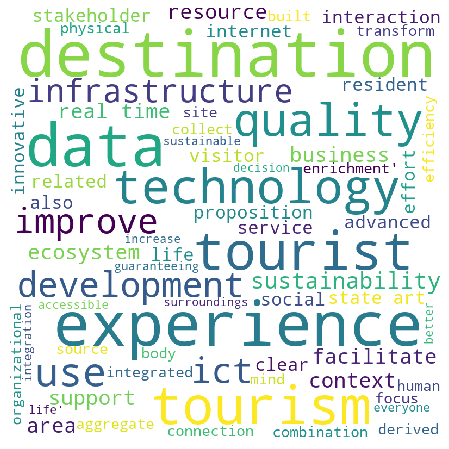

In [341]:
#set the word cloud parameters - for topic == tourism  
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(tour_def))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [328]:
len(enviro_df)
enviro

,Definitions,Domains,clean_def,word_count
0,“Smart University is a concept that involves a...,learning environment,smart university is a concept that involves a...,77
1,learning environments “… that can be regarded ...,learning environment,learning environments that can be regarded as ...,158
2,"“A smart, multi-disciplinary student-centric e...",learning environment,a smart multi disciplinary student centric ed...,59
3,“Education in a smart environment supported by...,learning environment,education in a smart environment supported by...,65
4,Intelligent campus (i-campus) as “… a new para...,learning environment,intelligent campus i campus as a new paradigm ...,72
5,“Smart campus is the outcome of the applicatio...,learning environment,smart campus is the outcome of the applicatio...,42
6,“A smart campus depends on an overarching stra...,learning environment,a smart campus depends on an overarching stra...,51
7,“… a SMART model of smart classroom which char...,learning environment,a smart model of smart classroom which charac...,17
8,"“Smart classrooms integrate voice-recognition,...",learning environment,smart classrooms integrate voice recognition ...,30
9,“Combining the IoT technology with social and ...,learning environment,combining the iot technology with social and ...,44


In [329]:
#Building word corpus from defintions for Topic = Enviro

# reset indexing prior to building individual word corpus
type(enviro_df)
enviro = enviro_df.reset_index(drop=True)
enviro.head()

from nltk.stem.wordnet import WordNetLemmatizer
enviro_def = []
for w in range(len(enviro)):
    print(w)
    
    split_text = enviro['clean_def'][w].split()
    print(split_text)
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    enviro_def.append(split_text)
enviro_def

0
['smart', 'university', 'is', 'a', 'concept', 'that', 'involves', 'a', 'comprehensive', 'modernization', 'of', 'all', 'educational', 'processes', 'the', 'smart', 'education', 'is', 'able', 'to', 'provide', 'a', 'new', 'university', 'where', 'a', 'set', 'of', 'ict', 'and', 'faculty', 'leads', 'to', 'an', 'entirely', 'new', 'quality', 'of', 'the', 'processes', 'and', 'outcomes', 'of', 'the', 'educational', 'research', 'commercial', 'and', 'other', 'university', 'activities', 'the', 'concept', 'of', 'smart', 'in', 'education', 'area', 'entails', 'the', 'emergence', 'of', 'technologies', 'such', 'as', 'smart', 'boards', 'smart', 'screens', 'and', 'wireless', 'internet', 'access', 'from', 'everywhere']
1
['learning', 'environments', 'that', 'can', 'be', 'regarded', 'as', 'the', 'technology', 'supported', 'learning', 'environments', 'that', 'make', 'adaptations', 'and', 'provide', 'appropriate', 'support', 'e', 'g', 'guidance', 'feedback', 'hints', 'or', 'tools', 'in', 'the', 'right', 'pla

['university concept involves comprehensive modernization educational process education able provide new university set ict faculty lead entirely new quality process outcome educational research commercial university activity concept education area entail emergence technology board screen wireless internet access everywhere',
 'learning environment regarded technology supported learning environment make adaptation provide appropriate support e g guidance feedback hint tool right place right time based individual learner need might determined via analyzing learning behavior performance online real world context situated learning environment context aware learner situation context real world environment learner located sensed learning environment able offer instant adaptive support learner immediate analysis need individual learner different perspective learning environment able adapt user interface e way presenting information subject content meet personal factor e g learning style pref

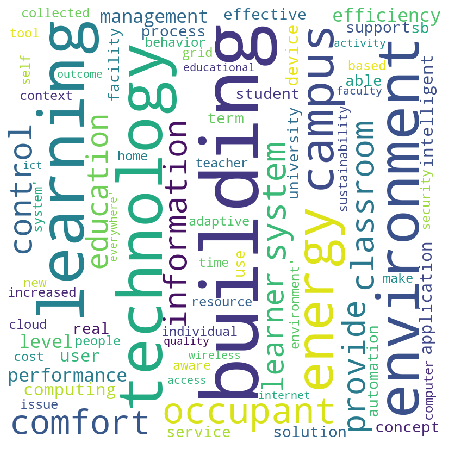

In [337]:
#set the word cloud parameters - for topic == enviro  
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(enviro_def))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [267]:
print(enviro_df['clean_def'])
range(len(enviro_df['clean_def']))

166     smart university is a concept that involves a...
167    learning environments that can be regarded as ...
168     a smart multi disciplinary student centric ed...
169     education in a smart environment supported by...
170    intelligent campus i campus as a new paradigm ...
171     smart campus is the outcome of the applicatio...
172     a smart campus depends on an overarching stra...
174     a smart model of smart classroom which charac...
175     smart classrooms integrate voice recognition ...
176     combining the iot technology with social and ...
177     smart classroom should implement and demonstr...
257     application of ubiquitous or pervasive comput...
259    the concept of smart is receiving a great amou...
260    buildings involve the usage of design solution...
261    buildings create an environment that maximizes...
262    these smart buildings decide the most efficien...
263     buildings provide user comfort solutions and ...
264    buildings are becoming m

range(0, 39)

In [334]:
#Building word corpus from defintions for Topic = Misc

# reset indexing prior to building individual word corpus
type(misc_df)
misc = misc_df.reset_index(drop=True)
misc.head()

from nltk.stem.wordnet import WordNetLemmatizer
misc_def = []
for w in range(len(misc)):
    print(w)
    
    split_text = misc['clean_def'][w].split()
    print(split_text)
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    misc_def.append(split_text)
misc_def

0
['automatic', 'computing', 'principles', 'such', 'as', 'self', 'configuration', 'selfprotection', 'self', 'healing', 'and', 'self', 'optimization']
1
['specific', 'tools', 'products', 'and', 'services', 'which', 'add', 'value', 'by', 'fostering', 'higher', 'connectivity', 'interaction', 'personalisation', 'and', 'co', 'creation', 'levels']
2
['approach', 'public', 'or', 'private', 'to', 'managing', 'development', 'that', 'leads', 'to', 'economic', 'advancement', 'without', 'the', 'congestion', 'and', 'environmental', 'degradation']
3
['economic', 'recovery', 'aiming', 'to', 'find', 'new', 'industrial', 'opportunities', 'for', 'europe', 'in', 'knowledge', 'intensive', 'and', 'innovative', 'industries']
4
['developing', 'an', 'economy', 'based', 'on', 'knowledge', 'and', 'innovation']
5
['adds', 'context', 'awareness', 'from', 'the', 'sensing', 'structure', 'of', 'scs']
6
['aims', 'to', 'enhance', 'emergency', 'assistance', 'autonomy', 'and', 'comfort', 'of', 'patients']
7
['intelligen

['automatic computing principle self configuration selfprotection self healing self optimization',
 'specific tool product service add value fostering higher connectivity interaction personalisation co creation level',
 'approach public private managing development lead economic advancement without congestion environmental degradation',
 'economic recovery aiming find new industrial opportunity europe knowledge intensive innovative industry',
 'developing economy based knowledge innovation',
 'add context awareness sensing structure sc',
 'aim enhance emergency assistance autonomy comfort patient',
 'intelligent widespread territorial level consisting cluster common joined long term prospect development innovation passing intelligent planning intelligent planning territory',
 'geographical area common shared policy increase competitiveness attractiveness territory particular attention social cohesion spread knowledge creative growth accessibility freedom movement usability environment 

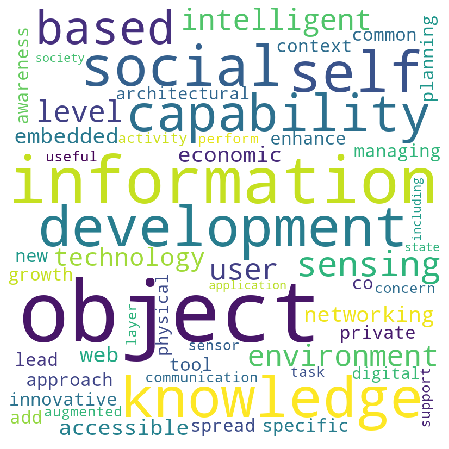

In [336]:
#set the word cloud parameters - for topic == misc  
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(misc_def))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [52]:

from sklearn.feature_extraction.text import CountVectorizer


def get_trigrams(descriptions, n=None):
    
    vec = CountVectorizer(ngram_range = (3,3), max_features = 20000).fit(descriptions)
    bag_of_words = vec.transform(descriptions)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]
#run the function on the processed descriptions
trigrams = get_trigrams(clean_desc, n=15)
#create a trigram data frame
trigram_df = pd.DataFrame(trigrams)
trigram_df.columns=["Trigram", "Freq"]
#output top 15 rows
trigram_df.head(15)

,Trigram,Freq
0,quality of life,44
1,the quality of,22
2,and social capital,15
3,high quality of,15
4,smart cities are,15
5,human and social,14
6,the use of,14
7,economic growth and,13
8,management of natural,13
9,of natural resources,13
